### Larvae-Vector System: Stability Analysis and Temperature Dependence

This notebook explores the stability of a linear ordinary differential equation (ODE) system modeling the dynamics of larvae and a disease vector population. We will analyze the system's eigenvalues and then introduce temperature-dependent parameters to see how stability changes.

---

### Part 1: General Analysis of the Linear System

First, we'll set up the symbolic representation of our ODE system and the corresponding matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.linalg import eigvals

# Define the symbolic variables
L, V, t = sp.symbols('L V t')
G, Y, F, Z = sp.symbols('G Y F Z')

# State the system of ODEs
print("The system of linear ordinary differential equations is:")
print("dL/dt = G*V - Y*L - F*L")
print("dV/dt = F*L - Z*V")
print("\n")

ModuleNotFoundError: No module named 'sympy'

The system can be written in the form $dX/dt = AX$, where $X = \begin{pmatrix} L \\ V \end{pmatrix}$ and $A$ is the matrix of coefficients. The stability of the system's equilibrium point (0,0) is determined by the eigenvalues of matrix $A$.

In [3]:
# Create the matrix A
A = sp.Matrix([[-Y - F, G],
               [F, -Z]])
print("The matrix A is:")
sp.pprint(A)
print("\n")

# Calculate the eigenvalues symbolically
tr_A = sp.trace(A)
det_A = sp.det(A)
print(f"The trace of A is: {tr_A}")
print(f"The determinant of A is: {det_A}")
print("\n")

print("The eigenvalues are found by solving the characteristic equation: \u03bb² - tr(A)\u03bb + det(A) = 0.")
print("The discriminant, \u0394 = tr(A)² - 4*det(A), determines the nature of the eigenvalues:")
print("- If \u0394 > 0, the eigenvalues are real and distinct.")
print("- If \u0394 < 0, the eigenvalues are a complex conjugate pair.")
print("- If \u0394 = 0, there is a single, repeated real eigenvalue.")
print("\n")

print("The stability of the system's equilibrium point is determined by the eigenvalues:")
print("- **Stable (Node or Spiral):** Both real parts of the eigenvalues are negative. All solutions converge to the equilibrium.")
print("- **Saddle Point (Unstable):** One real eigenvalue is positive and one is negative. Solutions move away from the equilibrium along one direction but toward it along another.")
print("- **Unstable (Node or Spiral):** Both real parts are positive. All solutions diverge from the equilibrium.")
print("- **Center (Neutrally Stable):** Eigenvalues are purely imaginary (real part is zero). Solutions form closed loops around the equilibrium.")

The matrix A is:
⎡-F - Y  G ⎤
⎢          ⎥
⎣  F     -Z⎦


The trace of A is: -F - Y - Z
The determinant of A is: -F*G + F*Z + Y*Z


The eigenvalues are found by solving the characteristic equation: λ² - tr(A)λ + det(A) = 0.
The discriminant, Δ = tr(A)² - 4*det(A), determines the nature of the eigenvalues:
- If Δ > 0, the eigenvalues are real and distinct.
- If Δ < 0, the eigenvalues are a complex conjugate pair.
- If Δ = 0, there is a single, repeated real eigenvalue.


The stability of the system's equilibrium point is determined by the eigenvalues:
- **Stable (Node or Spiral):** Both real parts of the eigenvalues are negative. All solutions converge to the equilibrium.
- **Saddle Point (Unstable):** One real eigenvalue is positive and one is negative. Solutions move away from the equilibrium along one direction but toward it along another.
- **Unstable (Node or Spiral):** Both real parts are positive. All solutions diverge from the equilibrium.
- **Center (Neutrally Stable):** Eigenv

---

### Part 2: Temperature Dependencies and Plotting

Now, we'll introduce some simplified, example functions for how the parameters depend on temperature. These functions are chosen to illustrate different behaviors but could be replaced with more realistic models.

In [4]:
# Define temperature-dependent parameters
def G_temp(T):
    return 0.1 * np.exp(0.05 * T)

def Y_temp(T):
    return 0.05 + 0.005 * T

def F_temp(T):
    # This is a parabolic function, modeling an optimal temperature for growth
    return 0.08 * (T - 10) * (35 - T) / 100

def Z_temp(T):
    return 0.1 + 0.002 * T**2

We can plot one of these functions to visualize its behavior across a range of temperatures. Here's a plot of the larval growth rate, $F$.

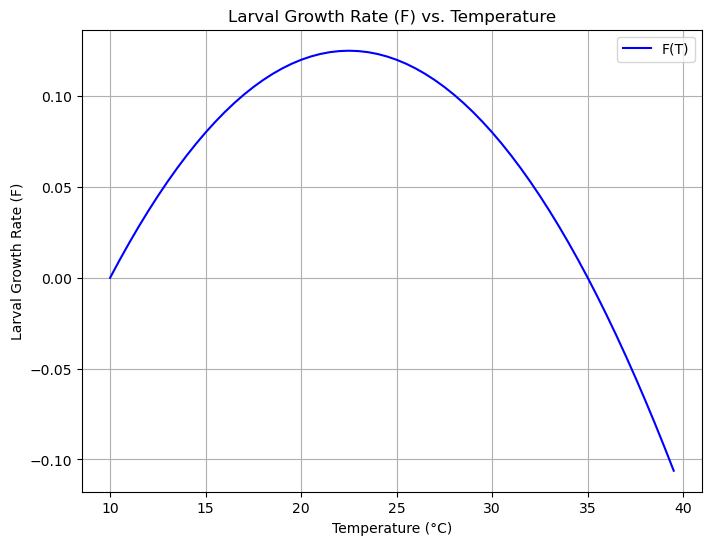

In [5]:
# Create a range of temperatures
temps = np.arange(10, 40, 0.5)

# Calculate the values of F over the temperature range
F_values = [F_temp(T) for T in temps]

# Plot the growth rate (F) vs. temperature
plt.figure(figsize=(8, 6))
plt.plot(temps, F_values, label='F(T)', color='blue')
plt.title('Larval Growth Rate (F) vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Larval Growth Rate (F)')
plt.grid(True)
plt.legend()
plt.show()

---

### Part 3: Analyzing Stability at a Specific Temperature

Finally, we'll pick a specific temperature, calculate the numerical values of our parameters, construct the matrix $A$, and find its eigenvalues to determine the system's stability at that temperature.

In [6]:
# Choose an example temperature
T_example = 25

# Calculate parameter values at the chosen temperature
G_val = G_temp(T_example)
Y_val = Y_temp(T_example)
F_val = F_temp(T_example)
Z_val = Z_temp(T_example)

# Create the numerical matrix A
A_numerical = np.array([[-Y_val - F_val, G_val],
                       [F_val, -Z_val]])

# Find the eigenvalues of the numerical matrix
eigenvalues = eigvals(A_numerical)

print(f"At T = {T_example}°C:")
print(f"G = {G_val:.4f}, Y = {Y_val:.4f}, F = {F_val:.4f}, Z = {Z_val:.4f}")
print(f"The eigenvalues are: {eigenvalues[0]:.4f} and {eigenvalues[1]:.4f}")

# Interpret the stability based on the eigenvalues
real_part_1 = np.real(eigenvalues[0])
real_part_2 = np.real(eigenvalues[1])

if real_part_1 < 0 and real_part_2 < 0:
    print("Both eigenvalues have negative real parts. The system is STABLE.")
    print("The populations will return to the equilibrium point after a disturbance.")
elif real_part_1 > 0 or real_part_2 > 0:
    print("At least one eigenvalue has a positive real part. The system is UNSTABLE.")
    if real_part_1 * real_part_2 < 0:
        print("Specifically, it is a saddle point.")
    print("The populations will diverge from the equilibrium point.")
else:
    print("The real parts are zero. The system is a CENTER (neutrally stable).")
    print("Populations will oscillate around the equilibrium but will not converge or diverge.")

At T = 25°C:
G = 0.3490, Y = 0.1750, F = 0.1200, Z = 1.3500
The eigenvalues are: -0.2567+0.0000j and -1.3883+0.0000j
Both eigenvalues have negative real parts. The system is STABLE.
The populations will return to the equilibrium point after a disturbance.


---